In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
arr1 = np.array([1,2,3,4,5])
arr1.ndim

1

In [13]:
arr2 = np.random.rand(4,4)
arr2.shape

(4, 4)

In [11]:
arr3 = np.random.randint(1,5,(2,5))
arr3

array([[3, 3, 4, 3, 2],
       [2, 4, 2, 1, 2]])

In [16]:
template = {
    'Name':["Ahmed",'Ali','Hussain'],
    'Age':[20,21,22],
    'City': ['Dhahran','Alahsa','Riyadh']
}

df = pd.DataFrame(template)
df.head(2)


,Name,Age,City
0,Ahmed,20,Dhahran
1,Ali,21,Alahsa


In [22]:
df2 = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/ChickWeight.csv")

In [23]:
df2.describe()

,weight,Time,Chick,Diet
count,578.000000,578.000000,578.000000,578.000000
mean,121.818339,21.435986,25.750865,2.235294
std,71.071960,13.516799,14.568795,1.162678
min,35.000000,0.000000,1.000000,1.000000
25%,63.000000,8.000000,13.000000,1.000000
50%,103.000000,20.000000,26.000000,2.000000
75%,163.750000,32.000000,38.000000,3.000000
max,373.000000,42.000000,50.000000,4.000000


In [26]:
df2.nunique()

weight    212
Time       12
Chick      50
Diet        4
dtype: int64

[]

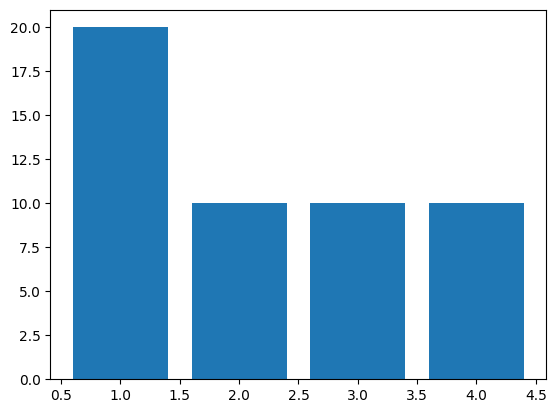

In [34]:
diet_table = df2.pivot_table(columns=['Diet'],aggfunc='nunique')
counts = diet_table.loc['Chick']
plt.bar(counts.index,counts.values)
plt.plot()

In [37]:
before_data = df2[df2['Time'] == df2['Time'].min()]
after_data =  df2[df2['Time'] == df2['Time'].max()]
len(before_data),len(after_data)

(50, 45)

<Axes: xlabel='Diet', ylabel='count'>

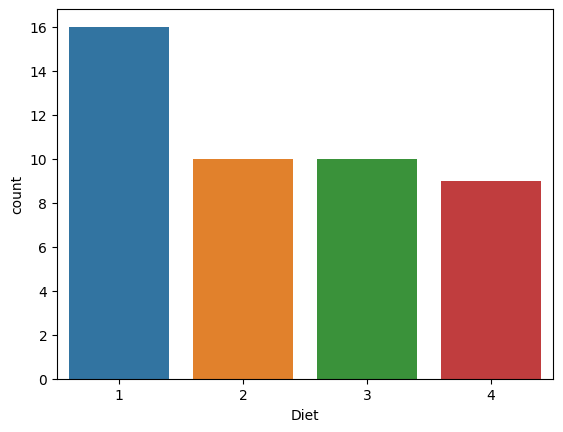

In [38]:
sns.countplot(data=after_data,x='Diet')

In [1]:
# BOOTCAMP 2 **************************************************

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/VireZee/Statistics-and-Probability/Stable/winequality-red.csv")

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
no_sulfur = data[['fixed acidity','volatile acidity','residual sugar','chlorides','pH','sulphates','alcohol','quality']]
no_sulfur.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,pH,sulphates,alcohol,quality
0,7.4,0.70,1.9,0.076,3.51,0.56,9.4,5
1,7.8,0.88,2.6,0.098,3.20,0.68,9.8,5
2,7.8,0.76,2.3,0.092,3.26,0.65,9.8,5
3,11.2,0.28,1.9,0.075,3.16,0.58,9.8,6
4,7.4,0.70,1.9,0.076,3.51,0.56,9.4,5


<Axes: >

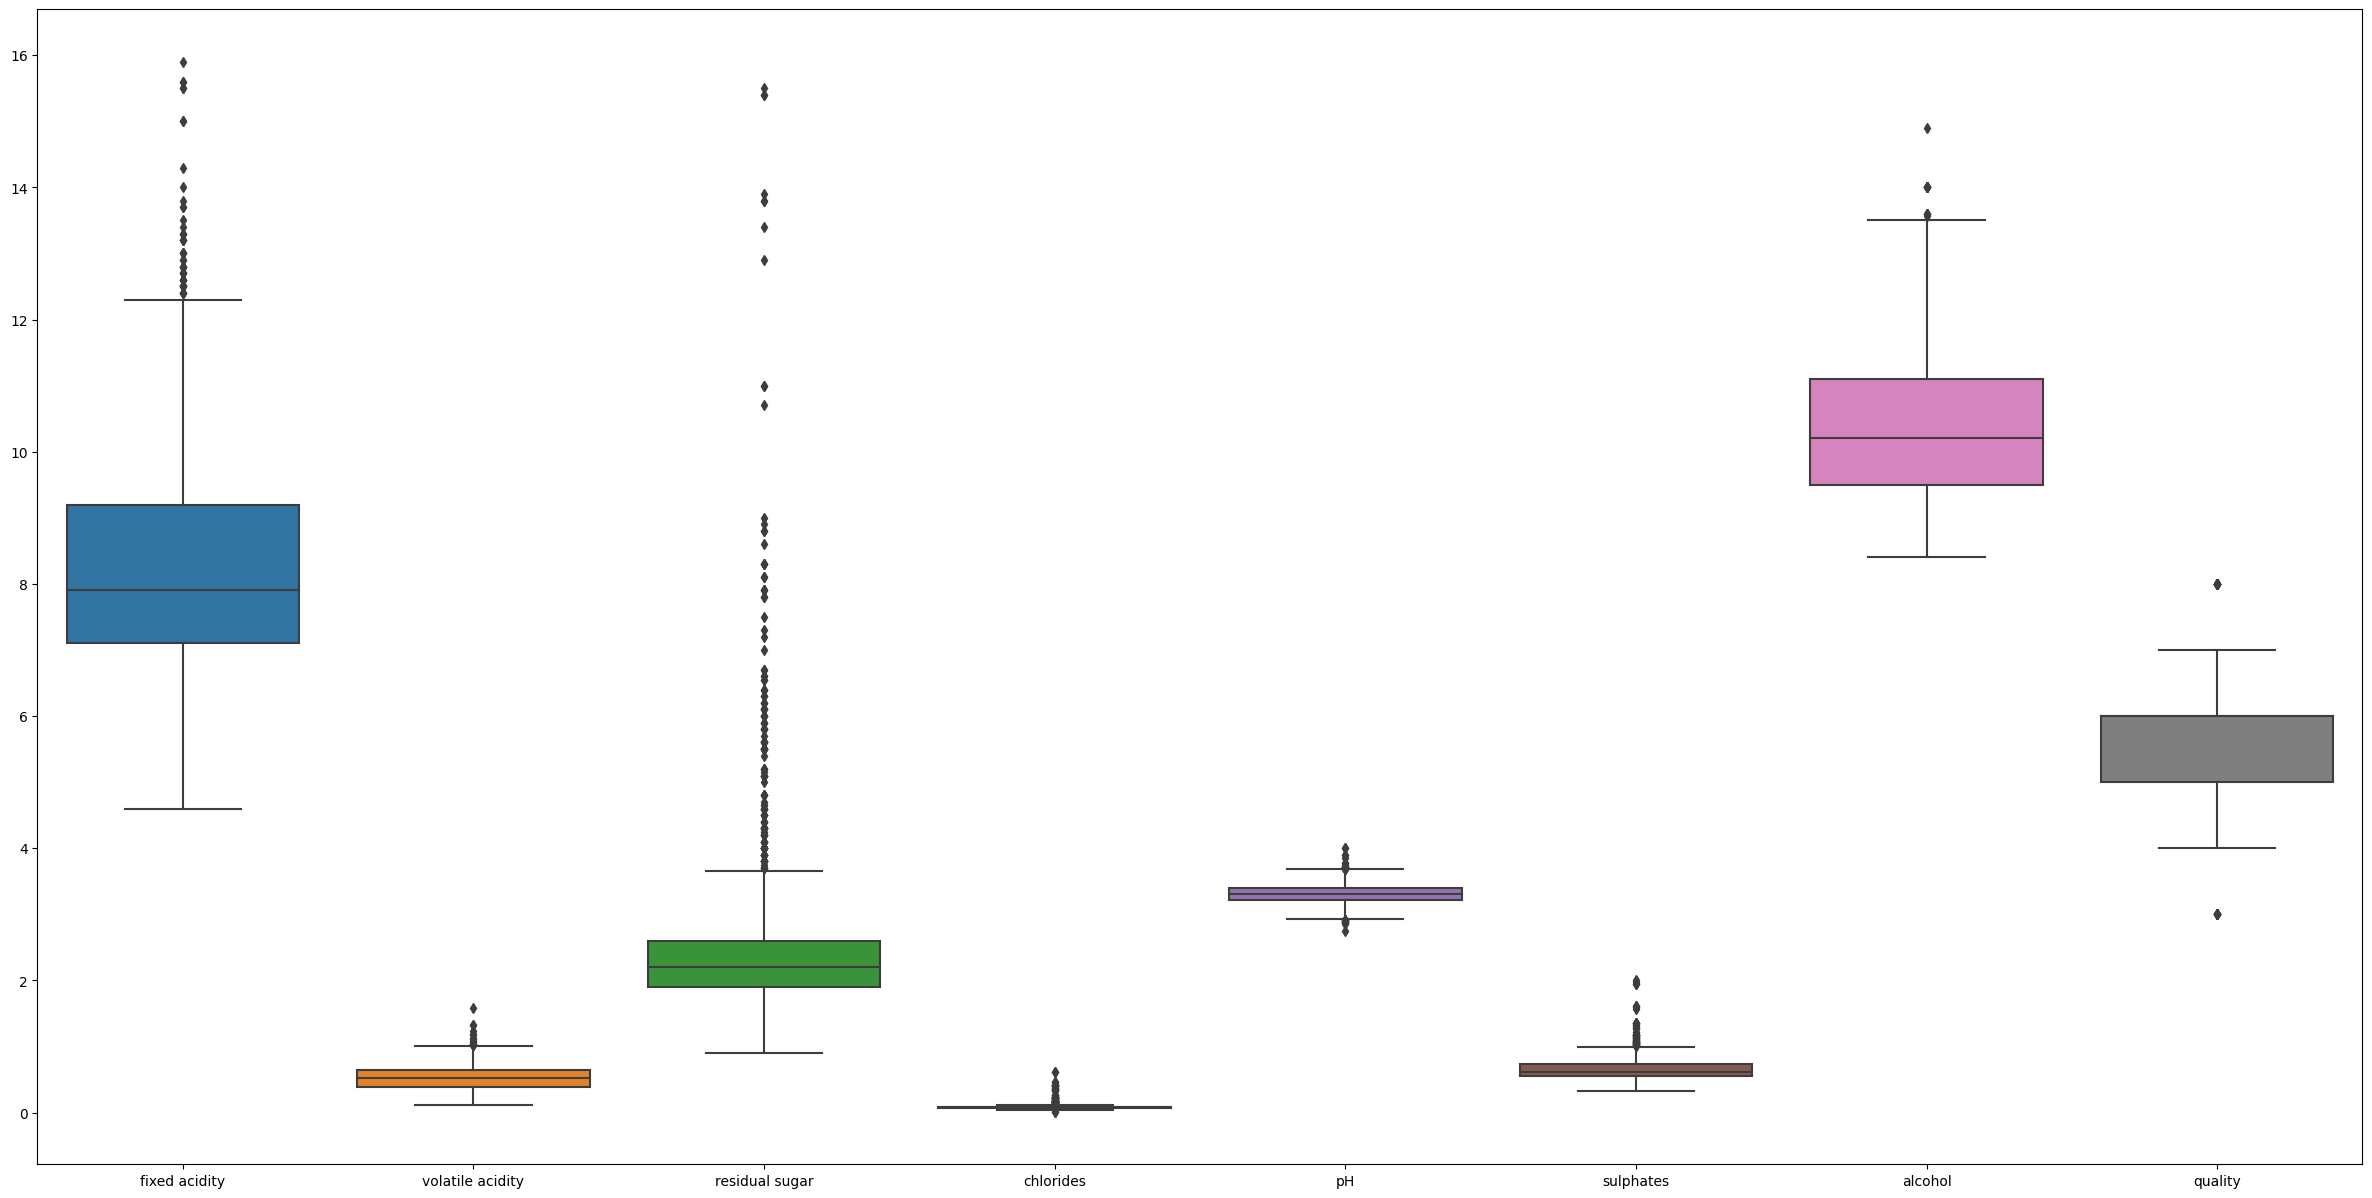

In [16]:
plt.figure(figsize=(30,15))
sns.boxplot(no_sulfur)

<Axes: >

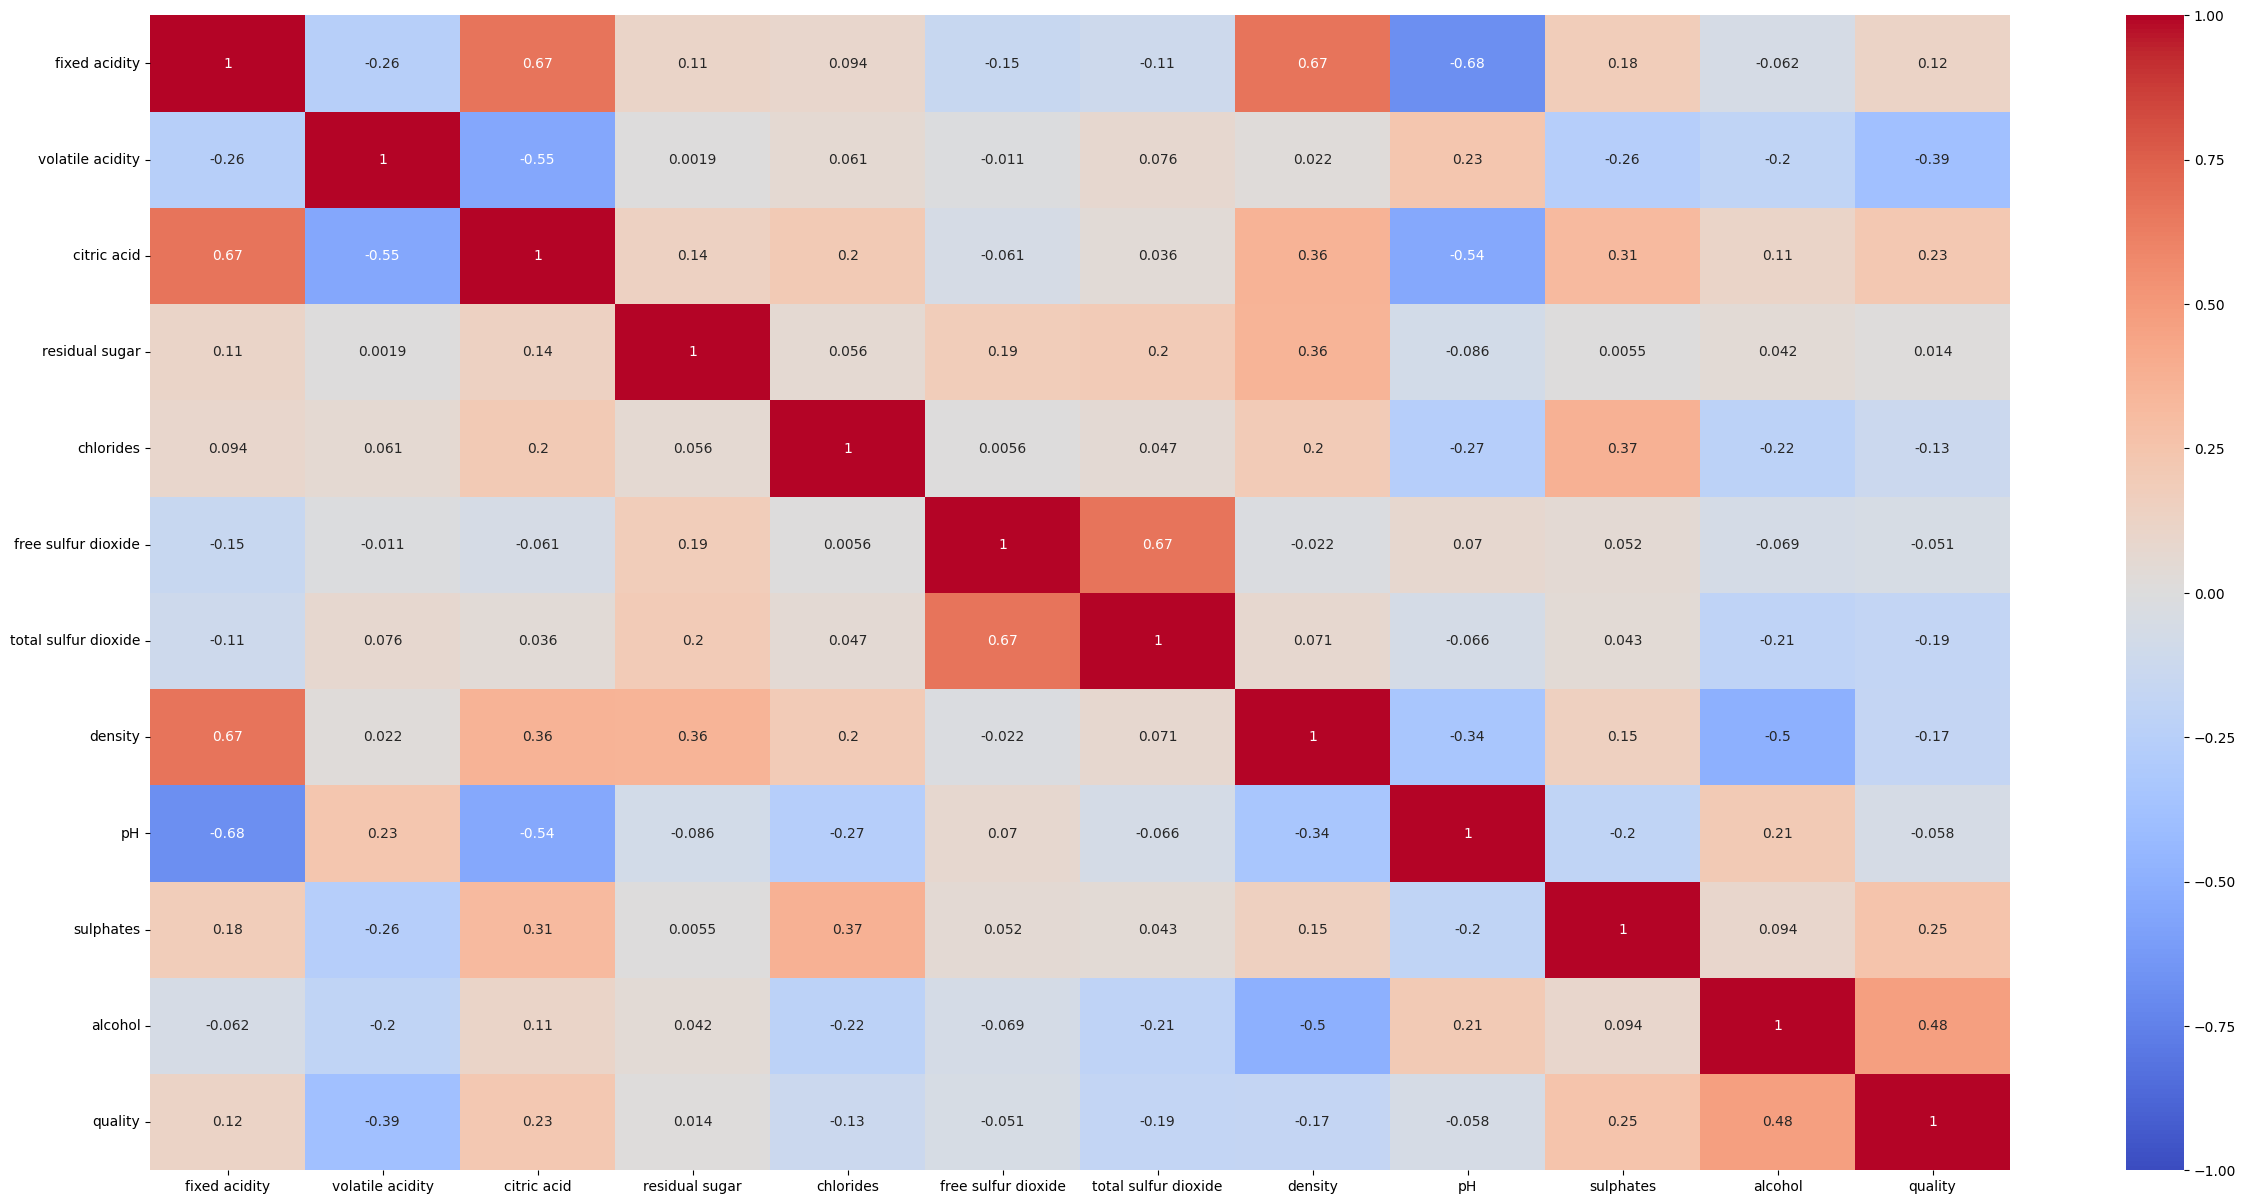

In [20]:
plt.figure(figsize=(30,15))
sns.heatmap(data.corr(),vmin=-1,vmax=1,cmap='coolwarm',annot=True)


In [28]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=7)

In [30]:
X_train

array([[12.5  ,  0.46 ,  0.63 , ...,  2.99 ,  0.87 , 10.2  ],
       [ 8.   ,  0.81 ,  0.25 , ...,  3.19 ,  0.42 ,  9.2  ],
       [ 6.9  ,  0.765,  0.02 , ...,  3.57 ,  0.78 ,  9.9  ],
       ...,
       [ 8.1  ,  0.825,  0.24 , ...,  3.37 ,  0.77 , 10.7  ],
       [10.9  ,  0.32 ,  0.52 , ...,  3.28 ,  0.77 , 11.5  ],
       [ 6.9  ,  0.5  ,  0.04 , ...,  3.35 ,  0.78 ,  9.5  ]])

In [31]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)
#quality of wine:
y_pred
mean_squared_error(y_test,y_pred)

0.37959710850229866

In [38]:
bankData = pd.read_csv("https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv")
bankData.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
41187,25,student,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [43]:
bankData['education']

0                   basic.4y
1                    unknown
2          university.degree
3                high.school
4                   basic.4y
                ...         
41183            high.school
41184               basic.4y
41185      university.degree
41186    professional.course
41187            high.school
Name: education, Length: 41188, dtype: object

In [45]:
bankData['education']= np.where(bankData['education']=='basic.4y','basic',bankData['education'])
bankData['education']= np.where(bankData['education']=='basic.6y','basic',bankData['education'])
bankData['education']= np.where(bankData['education']=='basic.9y','basic',bankData['education'])

In [49]:
cor_target = abs(bankData.corr()['y'])
cor_target

<ipython-input-49-b7dd2b93ee0d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_target = abs(bankData.corr()['y'])


age               0.030399
duration          0.405274
campaign          0.066357
pdays             0.324914
previous          0.230181
emp_var_rate      0.298334
cons_price_idx    0.136211
cons_conf_idx     0.054878
euribor3m         0.307771
nr_employed       0.354678
y                 1.000000
Name: y, dtype: float64

In [50]:
relevant_cols = cor_target[cor_target>0.25]
relevant_cols

duration        0.405274
pdays           0.324914
emp_var_rate    0.298334
euribor3m       0.307771
nr_employed     0.354678
y               1.000000
Name: y, dtype: float64

In [1]:
# TensorFlow vs PyTourch

#*TensorFlow is from Google
#*TensorFlow can be used in Web applications in JavaScript format

#* More than %92 of ai paper that are published has used PyTorch


In [2]:
########## Day 3

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [4]:
# set, repeat, rows, columns
rank_4_tensor = tf.zeros((2,3,4,5))
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [5]:
rank_4_tensor[:1,:2,:2,:2]


<tf.Tensor: shape=(1, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [6]:
indices = [0,1,2,3]
tf.one_hot(indices,depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [7]:
(X_train,y_train), (X_test,y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [9]:
random_sample = np.random.randint(low=0,high=6000)
display(X_train[random_sample])
display(y_train[random_sample])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   2,  88, 213, 253, 124,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  25, 252, 252, 252, 180,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

1

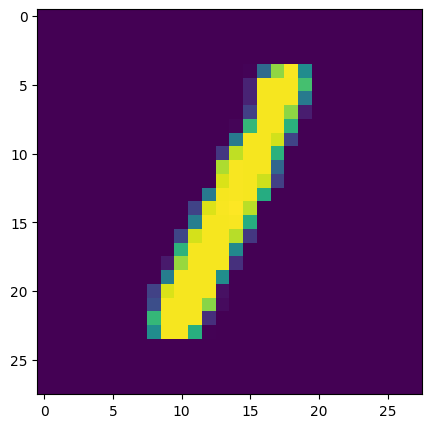

In [10]:
plt.figure(figsize=(5,5))
plt.imshow(X_train[random_sample])

In [11]:
X_train = X_train /255
X_test = X_test /255

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
y_train[0][0]

0.0

In [16]:
# use softmax if there's more than one class
model_0 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(256),
                                tf.keras.layers.Dense(512),
                                tf.keras.layers.Dense(256),
                                tf.keras.layers.Dense(10,activation='softmax')]
                              )

model_0.compile(
    loss='categorical_cross'+'entropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [17]:
history_0 = model_0.fit(
    X_train,
    y_train,
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 13s 4ms/step - loss: 0.4392 - accuracy: 0.8741
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3577 - accuracy: 0.8976
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3397 - accuracy: 0.9038
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3228 - accuracy: 0.9077
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3132 - accuracy: 0.9106
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3056 - accuracy: 0.9135
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3022 - accuracy: 0.9142
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2962 - accuracy: 0.9163
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2920 - accuracy: 0.9176
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.29

Text(0, 0.5, "['loss']")

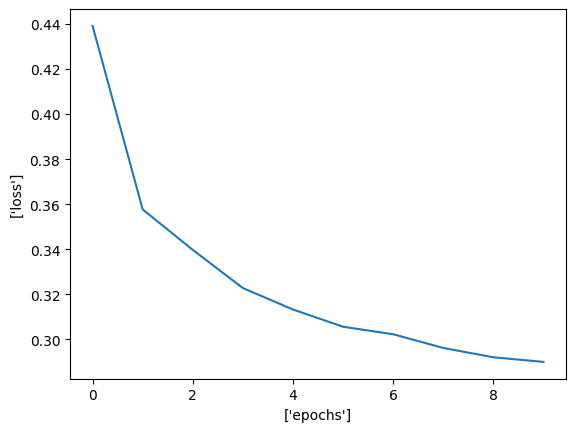

In [19]:
plt.plot(history_0.history['loss'])
plt.xlabel(['epochs'])
plt.ylabel(['loss'])

In [20]:
predictions = model_0.predict(X_test)
predictions

313/313 [==============================] - 1s 3ms/step


array([[7.94503547e-04, 2.75312684e-09, 9.02075335e-05, ...,
        9.43288505e-01, 3.01799719e-05, 1.77921887e-04],
       [5.86211308e-06, 1.40310572e-08, 9.99153972e-01, ...,
        1.03520372e-18, 9.23858315e-05, 1.39008627e-14],
       [6.44852753e-06, 9.83808935e-01, 8.44032038e-03, ...,
        9.93316993e-04, 2.42032879e-03, 1.04266794e-04],
       ...,
       [1.09437053e-07, 4.75252975e-08, 6.25054818e-05, ...,
        2.16733635e-04, 3.18468474e-02, 5.07971970e-03],
       [2.00203388e-07, 7.97176156e-08, 3.11883042e-07, ...,
        5.66274005e-09, 1.28827430e-02, 2.32969271e-08],
       [1.15799770e-08, 9.49293880e-14, 1.26110053e-05, ...,
        9.74501404e-13, 4.67564050e-08, 2.30553521e-10]], dtype=float32)

In [22]:
pred_values = tf.argmax(predictions,axis=1)
pred_values

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([7, 2, 1, ..., 4, 5, 6])>

In [31]:
def compareImages(y_true,y_pred,sample_size=5):
  fig,axes = plt.subplots(ncols=sample_size,sharex=False,sharey=True,figsize=(20,20))
  for i in range(sample_size):
    axes[i].set_title(f'Predictions {y_pred[i]} Truth {y_true[i]}')
    axes[i].imshow(X_test[i],cmap='gray')
    axes[i].get_yaxis().set_visible(False)
    axes[i].get_xaxis().set_visible(False)

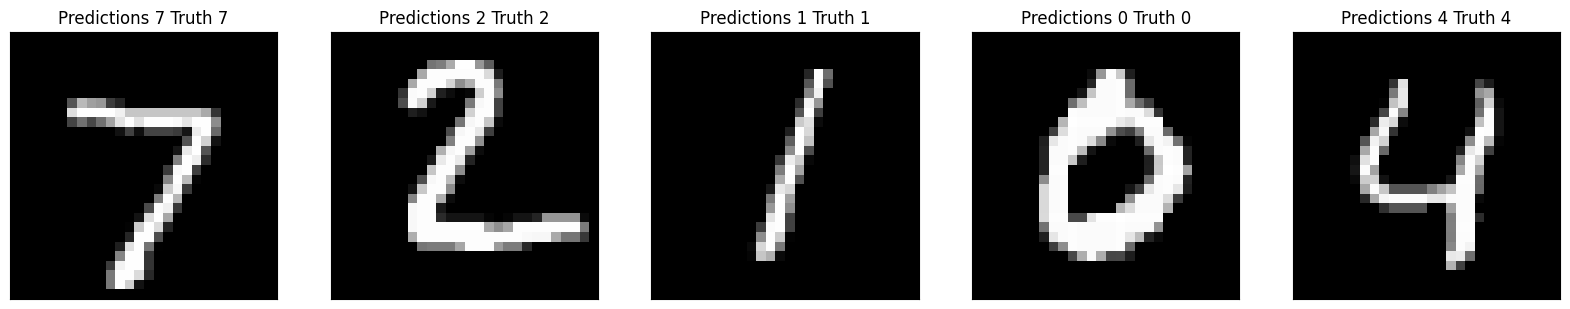

In [34]:
compareImages(
    y_true=y_test,
    y_pred=pred_values.numpy()
)
